In [122]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(',./Resources/diabetes_health_data.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 120)               2640      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [6]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback])

Epoch 1/200
5946/5946 [==============================] - 6s 989us/step - loss: -9.3992 - accuracy: 0.7185
Epoch 2/200
5946/5946 [==============================] - 6s 978us/step - loss: -429.2288 - accuracy: 0.6922
Epoch 3/200
5946/5946 [==============================] - 6s 965us/step - loss: -2761.5806 - accuracy: 0.6792
Epoch 4/200
5946/5946 [==============================] - 6s 976us/step - loss: -9197.4619 - accuracy: 0.66850s
Epoch 5/200
5946/5946 [==============================] - 6s 962us/step - loss: -23245.3711 - accuracy: 0.6651
Epoch 6/200
5946/5946 [==============================] - 6s 940us/step - loss: -48261.3047 - accuracy: 0.6603
Epoch 7/200
5946/5946 [==============================] - 6s 960us/step - loss: -88736.3516 - accuracy: 0.6596 0s - loss: -86060.0312 -
Epoch 8/200
5946/5946 [==============================] - 6s 981us/step - loss: -150494.0938 - accuracy: 0.6573
Epoch 9/200
5946/5946 [==============================] - 6s 980us/step - loss: -239131.2500 - accura

5946/5946 [==============================] - 6s 976us/step - loss: -586363840.0000 - accuracy: 0.6608
Epoch 67/200
5946/5946 [==============================] - 6s 984us/step - loss: -621802752.0000 - accuracy: 0.6602
Epoch 68/200
5946/5946 [==============================] - 6s 982us/step - loss: -659925632.0000 - accuracy: 0.6611 2
Epoch 69/200
5946/5946 [==============================] - 6s 1ms/step - loss: -698909952.0000 - accuracy: 0.6605A: 0s - loss: -679379840.0000 - accur
Epoch 70/200
5946/5946 [==============================] - 6s 981us/step - loss: -739625280.0000 - accuracy: 0.6598
Epoch 71/200
5946/5946 [==============================] - 6s 989us/step - loss: -784234688.0000 - accuracy: 0.6601 3s - loss: - ETA: 1s - 
Epoch 72/200
5946/5946 [==============================] - 6s 1ms/step - loss: -827767616.0000 - accuracy: 0.6606
Epoch 73/200
5946/5946 [==============================] - 6s 988us/step - loss: -873701376.0000 - accuracy: 0.6604 4s -
Epoch 74/200
5946/5946 [=====

5946/5946 [==============================] - 6s 998us/step - loss: -9158582272.0000 - accuracy: 0.6611
Epoch 133/200
5946/5946 [==============================] - 6s 1ms/step - loss: -9437185024.0000 - accuracy: 0.6613
Epoch 134/200
5946/5946 [==============================] - 6s 982us/step - loss: -9725131776.0000 - accuracy: 0.6614
Epoch 135/200
5946/5946 [==============================] - 6s 1ms/step - loss: -10014705664.0000 - accuracy: 0.6608A: 1s - loss: -1026173440
Epoch 136/200
5946/5946 [==============================] - 6s 999us/step - loss: -10312660992.0000 - accuracy: 0.6613s - loss: -8914323456.000
Epoch 137/200
5946/5946 [==============================] - 6s 985us/step - loss: -10617051136.0000 - accuracy: 0.6617 0s - loss: -10635720704.0000 - accuracy: 0.66
Epoch 138/200
5946/5946 [==============================] - 6s 999us/step - loss: -10927378432.0000 - accuracy: 0.6613
Epoch 139/200
5946/5946 [==============================] - 6s 991us/step - loss: -11253977088.0000 

5946/5946 [==============================] - 6s 987us/step - loss: -37311774720.0000 - accuracy: 0.6618
Epoch 189/200
5946/5946 [==============================] - 6s 980us/step - loss: -38112612352.0000 - accuracy: 0.6617 0s - loss: -38431465472.0000 - 
Epoch 190/200
5946/5946 [==============================] - 6s 992us/step - loss: -38917435392.0000 - accuracy: 0.6614 4s - l - ETA: 2s - loss: -40035622912 - ETA: 1s - loss: -40537223
Epoch 191/200
5946/5946 [==============================] - 6s 988us/step - loss: -39733329920.0000 - accuracy: 0.6618
Epoch 192/200
5946/5946 [==============================] - 6s 999us/step - loss: -40570384384.0000 - accuracy: 0.6616
Epoch 193/200
5946/5946 [==============================] - 6s 997us/step - loss: -41425838080.0000 - accuracy: 0.6614 2s - loss: -38385659904.0000 - accuracy: 0. - ETA: 2s - l
Epoch 194/200
5946/5946 [==============================] - 6s 992us/step - loss: -42275827712.0000 - accuracy: 0.6621
Epoch 195/200
5946/5946 [=======

In [7]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: -3.7684e+10 - accuracy: 0.7973
Loss: -37683994624.0, Accuracy: 0.7973036766052246


## Attempt 2

In [8]:
df_modded = df.drop(columns=["Education", "Income"])
df_modded.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0


In [9]:
# Split our preprocessed data into our features and target arrays
y = df_modded["Diabetes_012"].values
X = df_modded.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 120)               2400      
_________________________________________________________________
dense_5 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_6 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 31        
Total params: 10,011
Trainable params: 10,011
Non-trainable params: 0
_________________________________________________________________


In [12]:
nn2.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn2.fit(X_train_scaled, y_train, batch_size=32, epochs=200, callbacks=[callback])

Epoch 1/200
5946/5946 [==============================] - 6s 982us/step - loss: 0.3962 - accuracy: 0.7154
Epoch 2/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3927 - accuracy: 0.7219
Epoch 3/200
5946/5946 [==============================] - 6s 981us/step - loss: 0.3917 - accuracy: 0.7227
Epoch 4/200
5946/5946 [==============================] - 6s 974us/step - loss: 0.3910 - accuracy: 0.7240
Epoch 5/200
5946/5946 [==============================] - 6s 969us/step - loss: 0.3905 - accuracy: 0.7214
Epoch 6/200
5946/5946 [==============================] - 6s 992us/step - loss: 0.3898 - accuracy: 0.7226
Epoch 7/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3894 - accuracy: 0.7242
Epoch 8/200
5946/5946 [==============================] - 6s 944us/step - loss: 0.3888 - accuracy: 0.7245
Epoch 9/200
5946/5946 [==============================] - 6s 933us/step - loss: 0.3883 - accuracy: 0.7250
Epoch 10/200
5946/5946 [==============================] - 6

5946/5946 [==============================] - 6s 966us/step - loss: 0.3620 - accuracy: 0.7503
Epoch 74/200
5946/5946 [==============================] - 6s 982us/step - loss: 0.3613 - accuracy: 0.7517
Epoch 75/200
5946/5946 [==============================] - 6s 970us/step - loss: 0.3614 - accuracy: 0.7508
Epoch 76/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3617 - accuracy: 0.7513
Epoch 77/200
5946/5946 [==============================] - 6s 973us/step - loss: 0.3607 - accuracy: 0.7526
Epoch 78/200
5946/5946 [==============================] - 6s 988us/step - loss: 0.3612 - accuracy: 0.7514
Epoch 79/200
5946/5946 [==============================] - 6s 977us/step - loss: 0.3603 - accuracy: 0.7516
Epoch 80/200
5946/5946 [==============================] - 6s 978us/step - loss: 0.3609 - accuracy: 0.7508
Epoch 81/200
5946/5946 [==============================] - 6s 958us/step - loss: 0.3608 - accuracy: 0.75170s - loss: 0.3
Epoch 82/200
5946/5946 [=======================

In [13]:
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4119 - accuracy: 0.7346
Loss: 0.41191360354423523, Accuracy: 0.734626293182373


## Attempt 3
### Similar to Attempt 1 but Batch size is larger and different loss.

In [16]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn3 = tf.keras.models.Sequential()

# First hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn3.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 120)               2640      
_________________________________________________________________
dense_9 (Dense)              (None, 50)                6050      
_________________________________________________________________
dense_10 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [18]:
nn3.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn3.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback])

Epoch 1/200
5946/5946 [==============================] - 6s 986us/step - loss: 0.3958 - accuracy: 0.7185
Epoch 2/200
5946/5946 [==============================] - 6s 944us/step - loss: 0.3918 - accuracy: 0.7240
Epoch 3/200
5946/5946 [==============================] - 6s 990us/step - loss: 0.3909 - accuracy: 0.7260
Epoch 4/200
5946/5946 [==============================] - 6s 979us/step - loss: 0.3901 - accuracy: 0.7256
Epoch 5/200
5946/5946 [==============================] - 6s 965us/step - loss: 0.3893 - accuracy: 0.72631s - loss: 0.389
Epoch 6/200
5946/5946 [==============================] - 6s 982us/step - loss: 0.3887 - accuracy: 0.7265
Epoch 7/200
5946/5946 [==============================] - 6s 965us/step - loss: 0.3881 - accuracy: 0.7292
Epoch 8/200
5946/5946 [==============================] - 6s 975us/step - loss: 0.3874 - accuracy: 0.72581s - loss: 0.3874 - accuracy:  - ETA: 1s - loss: 0 - ETA: 0s - loss: 0.3870 - accuracy - ETA: 0s - loss: 0.3870 - accu
Epoch 9/200
5946/5946 [===

5946/5946 [==============================] - 6s 937us/step - loss: 0.3528 - accuracy: 0.76490s - loss: 0.352
Epoch 75/200
5946/5946 [==============================] - 6s 944us/step - loss: 0.3531 - accuracy: 0.7644
Epoch 76/200
5946/5946 [==============================] - 6s 945us/step - loss: 0.3527 - accuracy: 0.7651
Epoch 77/200
5946/5946 [==============================] - 6s 939us/step - loss: 0.3519 - accuracy: 0.7658
Epoch 78/200
5946/5946 [==============================] - 6s 949us/step - loss: 0.3518 - accuracy: 0.7647
Epoch 79/200
5946/5946 [==============================] - 6s 955us/step - loss: 0.3518 - accuracy: 0.7656
Epoch 80/200
5946/5946 [==============================] - 6s 958us/step - loss: 0.3512 - accuracy: 0.7654
Epoch 81/200
5946/5946 [==============================] - 6s 947us/step - loss: 0.3516 - accuracy: 0.76490s - loss: 0.3516 
Epoch 82/200
5946/5946 [==============================] - 6s 966us/step - loss: 0.3508 - accuracy: 0.7651
Epoch 83/200
5946/5946 [=

In [19]:
model_loss, model_accuracy = nn3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4151 - accuracy: 0.7377
Loss: 0.41514310240745544, Accuracy: 0.7377483248710632


## Attempt 4
### Kept columns above 0.05 of importance

In [20]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn4 = tf.keras.models.Sequential()

# First hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn4.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_13 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 31        
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________


In [22]:
nn4.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn4.fit(X_train_scaled,y_train, batch_size = 64, epochs=100, callbacks=[callback])

Epoch 1/100
2973/2973 [==============================] - 3s 984us/step - loss: 0.4246 - accuracy: 0.7134
Epoch 2/100
2973/2973 [==============================] - 3s 952us/step - loss: 0.4223 - accuracy: 0.7181
Epoch 3/100
2973/2973 [==============================] - 3s 941us/step - loss: 0.4219 - accuracy: 0.71690s - loss: 0.4219 - accuracy: 0.71
Epoch 4/100
2973/2973 [==============================] - 3s 951us/step - loss: 0.4216 - accuracy: 0.7188
Epoch 5/100
2973/2973 [==============================] - 3s 960us/step - loss: 0.4213 - accuracy: 0.7182
Epoch 6/100
2973/2973 [==============================] - 3s 937us/step - loss: 0.4212 - accuracy: 0.7153
Epoch 7/100
2973/2973 [==============================] - 3s 959us/step - loss: 0.4211 - accuracy: 0.7185
Epoch 8/100
2973/2973 [==============================] - 3s 915us/step - loss: 0.4210 - accuracy: 0.7183
Epoch 9/100
2973/2973 [==============================] - 3s 906us/step - loss: 0.4209 - accuracy: 0.7177
Epoch 10/100
2973/297

2973/2973 [==============================] - 3s 984us/step - loss: 0.4157 - accuracy: 0.7172


In [23]:
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4229 - accuracy: 0.7140
Loss: 0.42289119958877563, Accuracy: 0.714049220085144


## Attempt 5
### LeakyReLU

In [24]:
from keras.layers import LeakyReLU

In [25]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn5 = tf.keras.models.Sequential()

# First hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn5.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_17 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_18 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 31        
Total params: 9,411
Trainable params: 9,411
Non-trainable params: 0
_________________________________________________________________


In [27]:
nn5.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn5.fit(X_train_scaled,y_train, batch_size = 64, epochs=100, callbacks=[callback])

Epoch 1/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4242 - accuracy: 0.7130
Epoch 2/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4224 - accuracy: 0.7200: 0s - loss: 0.4216 - 
Epoch 3/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4220 - accuracy: 0.7185
Epoch 4/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4217 - accuracy: 0.7169
Epoch 5/100
2973/2973 [==============================] - 3s 998us/step - loss: 0.4216 - accuracy: 0.7166
Epoch 6/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4214 - accuracy: 0.7182
Epoch 7/100
2973/2973 [==============================] - 3s 983us/step - loss: 0.4212 - accuracy: 0.7175
Epoch 8/100
2973/2973 [==============================] - 3s 993us/step - loss: 0.4211 - accuracy: 0.7162
Epoch 9/100
2973/2973 [==============================] - 3s 997us/step - loss: 0.4210 - accuracy: 0.71730s - loss: 0.4212 - accuracy: 0.71
Epoch 10/

2973/2973 [==============================] - 3s 1ms/step - loss: 0.4165 - accuracy: 0.7232
Epoch 77/100
2973/2973 [==============================] - 3s 987us/step - loss: 0.4165 - accuracy: 0.7228
Epoch 78/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4165 - accuracy: 0.7226
Epoch 79/100
2973/2973 [==============================] - 3s 1ms/step - loss: 0.4165 - accuracy: 0.7236


In [28]:
model_loss, model_accuracy = nn5.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4226 - accuracy: 0.7032
Loss: 0.4226335883140564, Accuracy: 0.7031851410865784


## Attempt 6
### Batch size decreased. Nodes increased. Keeping 7 most important. LeakyReLU

In [29]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns=['Diabetes_012', 'BMI', 'Age', 'Income', 'PhysHlth', 'Education', 'GenHlth', 'MentHlth']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 40
nn6 = tf.keras.models.Sequential()

# First hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="sigmoid"))

# Second hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn6.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 120)               1800      
_________________________________________________________________
dense_21 (Dense)             (None, 80)                9680      
_________________________________________________________________
dense_22 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 41        
Total params: 14,761
Trainable params: 14,761
Non-trainable params: 0
_________________________________________________________________


In [31]:
nn6.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn6.fit(X_train_scaled,y_train, batch_size = 16, epochs=100, callbacks=[callback])

Epoch 1/100
11892/11892 [==============================] - 12s 954us/step - loss: 0.4257 - accuracy: 0.7174
Epoch 2/100
11892/11892 [==============================] - 11s 943us/step - loss: 0.4234 - accuracy: 0.7141s - loss: 0.4234 - accuracy: 0.71
Epoch 3/100
11892/11892 [==============================] - 11s 953us/step - loss: 0.4229 - accuracy: 0.7161
Epoch 4/100
11892/11892 [==============================] - 11s 950us/step - loss: 0.4225 - accuracy: 0.7110
Epoch 5/100
11892/11892 [==============================] - 11s 950us/step - loss: 0.4222 - accuracy: 0.7122
Epoch 6/100
11892/11892 [==============================] - 11s 954us/step - loss: 0.4221 - accuracy: 0.7157
Epoch 7/100
11892/11892 [==============================] - 11s 951us/step - loss: 0.4219 - accuracy: 0.7134
Epoch 8/100
11892/11892 [==============================] - 11s 954us/step - loss: 0.4219 - accuracy: 0.7127
Epoch 9/100
11892/11892 [==============================] - ETA: 0s - loss: 0.4217 - accuracy: 0.71 - 11

11892/11892 [==============================] - 11s 961us/step - loss: 0.4173 - accuracy: 0.7217
Epoch 73/100
11892/11892 [==============================] - 11s 958us/step - loss: 0.4172 - accuracy: 0.7208
Epoch 74/100
11892/11892 [==============================] - 11s 957us/step - loss: 0.4172 - accuracy: 0.7201


In [32]:
model_loss, model_accuracy = nn6.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4212 - accuracy: 0.7294
Loss: 0.42117616534233093, Accuracy: 0.7294386625289917


## Attempt 7
### Removing pre diabetes. Batch default. Keeping all the columns. Similar to Attempt 2

In [33]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [34]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [35]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn7 = tf.keras.models.Sequential()

# First hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn7.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn7.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_25 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_26 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [36]:
nn7.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn7.fit(X_train_scaled,y_train, batch_size = 32, epochs=100, callbacks=[callback])

Epoch 1/100
5838/5838 [==============================] - 6s 984us/step - loss: 0.3940 - accuracy: 0.7300
Epoch 2/100
5838/5838 [==============================] - 6s 971us/step - loss: 0.3905 - accuracy: 0.7370
Epoch 3/100
5838/5838 [==============================] - 6s 966us/step - loss: 0.3895 - accuracy: 0.73810s - loss: 0.3892 - accuracy: 
Epoch 4/100
5838/5838 [==============================] - 6s 964us/step - loss: 0.3888 - accuracy: 0.7404
Epoch 5/100
5838/5838 [==============================] - 6s 968us/step - loss: 0.3880 - accuracy: 0.7403
Epoch 6/100
5838/5838 [==============================] - 6s 961us/step - loss: 0.3876 - accuracy: 0.74090s - los
Epoch 7/100
5838/5838 [==============================] - 6s 958us/step - loss: 0.3870 - accuracy: 0.7404
Epoch 8/100
5838/5838 [==============================] - 6s 955us/step - loss: 0.3865 - accuracy: 0.7423
Epoch 9/100
5838/5838 [==============================] - 6s 943us/step - loss: 0.3859 - accuracy: 0.74190s - loss: 0.3863 

5838/5838 [==============================] - 6s 948us/step - loss: 0.3545 - accuracy: 0.7625
Epoch 75/100
5838/5838 [==============================] - 5s 937us/step - loss: 0.3538 - accuracy: 0.7623
Epoch 76/100
5838/5838 [==============================] - 6s 943us/step - loss: 0.3534 - accuracy: 0.7621
Epoch 77/100
5838/5838 [==============================] - 6s 952us/step - loss: 0.3535 - accuracy: 0.7625
Epoch 78/100
5838/5838 [==============================] - 5s 939us/step - loss: 0.3528 - accuracy: 0.7622
Epoch 79/100
5838/5838 [==============================] - 5s 942us/step - loss: 0.3525 - accuracy: 0.7629
Epoch 80/100
5838/5838 [==============================] - 6s 950us/step - loss: 0.3524 - accuracy: 0.7630
Epoch 81/100
5838/5838 [==============================] - 5s 942us/step - loss: 0.3519 - accuracy: 0.7633
Epoch 82/100
5838/5838 [==============================] - 6s 957us/step - loss: 0.3518 - accuracy: 0.7634
Epoch 83/100
5838/5838 [==============================] - 6

In [37]:
model_loss, model_accuracy = nn7.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4240 - accuracy: 0.7370
Loss: 0.4239537715911865, Accuracy: 0.7369706034660339


## Attempt 8

In [38]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [39]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn8 = tf.keras.models.Sequential()

# First hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn8.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn8.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_29 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_30 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [41]:
nn8.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn8.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback])

Epoch 1/200
5838/5838 [==============================] - 6s 967us/step - loss: 0.3940 - accuracy: 0.7309
Epoch 2/200
5838/5838 [==============================] - 6s 960us/step - loss: 0.3905 - accuracy: 0.73780s -
Epoch 3/200
5838/5838 [==============================] - 6s 958us/step - loss: 0.3896 - accuracy: 0.74010s - loss: 0.3895 - accuracy
Epoch 4/200
5838/5838 [==============================] - 6s 968us/step - loss: 0.3886 - accuracy: 0.7367
Epoch 5/200
5838/5838 [==============================] - 6s 970us/step - loss: 0.3882 - accuracy: 0.7382
Epoch 6/200
5838/5838 [==============================] - 6s 954us/step - loss: 0.3875 - accuracy: 0.74050s - loss: 0.387
Epoch 7/200
5838/5838 [==============================] - 6s 958us/step - loss: 0.3871 - accuracy: 0.73740s - loss: 0.3870 - accuracy: 0.
Epoch 8/200
5838/5838 [==============================] - 6s 961us/step - loss: 0.3865 - accuracy: 0.7416
Epoch 9/200
5838/5838 [==============================] - 6s 959us/step - loss: 0

5838/5838 [==============================] - 5s 872us/step - loss: 0.3537 - accuracy: 0.7663
Epoch 77/200
5838/5838 [==============================] - 5s 866us/step - loss: 0.3530 - accuracy: 0.7662
Epoch 78/200
5838/5838 [==============================] - 5s 859us/step - loss: 0.3526 - accuracy: 0.7667
Epoch 79/200
5838/5838 [==============================] - 5s 851us/step - loss: 0.3526 - accuracy: 0.7666
Epoch 80/200
5838/5838 [==============================] - 5s 860us/step - loss: 0.3524 - accuracy: 0.7674
Epoch 81/200
5838/5838 [==============================] - 5s 852us/step - loss: 0.3523 - accuracy: 0.7666
Epoch 82/200
5838/5838 [==============================] - 5s 866us/step - loss: 0.3516 - accuracy: 0.7683
Epoch 83/200
5838/5838 [==============================] - 5s 850us/step - loss: 0.3516 - accuracy: 0.7680
Epoch 84/200
5838/5838 [==============================] - 5s 860us/step - loss: 0.3514 - accuracy: 0.7668
Epoch 85/200
5838/5838 [==============================] - 5

In [42]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4287 - accuracy: 0.7499
Loss: 0.4287489056587219, Accuracy: 0.7498514652252197


## Attempt 9

In [43]:
df_no_pre = df[df["Diabetes_012"] != 1]
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [44]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn9 = tf.keras.models.Sequential()

# First hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn9.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn9.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_33 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_34 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [46]:
nn9.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn9.fit(X_train_scaled,y_train, batch_size = 16, epochs=200, callbacks=[callback])

Epoch 1/200
11675/11675 [==============================] - 10s 826us/step - loss: 0.3941 - accuracy: 0.7340
Epoch 2/200
11675/11675 [==============================] - 10s 838us/step - loss: 0.3908 - accuracy: 0.7383
Epoch 3/200
11675/11675 [==============================] - 10s 826us/step - loss: 0.3897 - accuracy: 0.7405
Epoch 4/200
11675/11675 [==============================] - 9s 808us/step - loss: 0.3890 - accuracy: 0.7418
Epoch 5/200
11675/11675 [==============================] - 10s 820us/step - loss: 0.3886 - accuracy: 0.7414
Epoch 6/200
11675/11675 [==============================] - 10s 816us/step - loss: 0.3879 - accuracy: 0.7392
Epoch 7/200
11675/11675 [==============================] - 10s 836us/step - loss: 0.3876 - accuracy: 0.7433
Epoch 8/200
11675/11675 [==============================] - 10s 823us/step - loss: 0.3872 - accuracy: 0.7423
Epoch 9/200
11675/11675 [==============================] - 10s 820us/step - loss: 0.3866 - accuracy: 0.7416
Epoch 10/200
11675/11675 [===

11675/11675 [==============================] - 11s 914us/step - loss: 0.3599 - accuracy: 0.7646
Epoch 74/200
11675/11675 [==============================] - 11s 914us/step - loss: 0.3596 - accuracy: 0.7645
Epoch 75/200
11675/11675 [==============================] - 11s 921us/step - loss: 0.3595 - accuracy: 0.7646
Epoch 76/200
11675/11675 [==============================] - 11s 913us/step - loss: 0.3590 - accuracy: 0.7653
Epoch 77/200
11675/11675 [==============================] - 11s 910us/step - loss: 0.3589 - accuracy: 0.7656
Epoch 78/200
11675/11675 [==============================] - 11s 916us/step - loss: 0.3579 - accuracy: 0.7663
Epoch 79/200
11675/11675 [==============================] - 11s 913us/step - loss: 0.3582 - accuracy: 0.7659
Epoch 80/200
11675/11675 [==============================] - 11s 906us/step - loss: 0.3585 - accuracy: 0.7663
Epoch 81/200
11675/11675 [==============================] - 10s 891us/step - loss: 0.3579 - accuracy: 0.7653s - loss: 0
Epoch 82/200
11675/11

In [47]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4287 - accuracy: 0.7499
Loss: 0.4287489056587219, Accuracy: 0.7498514652252197


## Attempt 10

In [48]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn10 = tf.keras.models.Sequential()

# First hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn10.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn10.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn10.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_37 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_38 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [50]:
nn10.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn10.fit(X_train_scaled,y_train, batch_size = 8, epochs=200, callbacks=[callback])

Epoch 1/200
23349/23349 [==============================] - 22s 916us/step - loss: 0.3944 - accuracy: 0.7378
Epoch 2/200
23349/23349 [==============================] - 22s 923us/step - loss: 0.3910 - accuracy: 0.7443s - loss: 0.3911 - accu - E - ETA: 0s - loss: 0.3908 - accuracy: 
Epoch 3/200
23349/23349 [==============================] - 21s 918us/step - loss: 0.3899 - accuracy: 0.7424
Epoch 4/200
23349/23349 [==============================] - 22s 925us/step - loss: 0.3896 - accuracy: 0.7408
Epoch 5/200
23349/23349 [==============================] - 22s 941us/step - loss: 0.3891 - accuracy: 0.7425
Epoch 6/200
23349/23349 [==============================] - 22s 949us/step - loss: 0.3885 - accuracy: 0.7429
Epoch 7/200
23349/23349 [==============================] - 22s 926us/step - loss: 0.3882 - accuracy: 0.7448
Epoch 8/200
23349/23349 [==============================] - ETA: 0s - loss: 0.3876 - accuracy: 0.7432 ETA: 0s - loss: 0.3875 - accura - 21s 917us/step - loss: 0.3877 - accuracy: 0.

23349/23349 [==============================] - 20s 861us/step - loss: 0.3693 - accuracy: 0.7651
Epoch 72/200
23349/23349 [==============================] - 19s 832us/step - loss: 0.3686 - accuracy: 0.7649
Epoch 73/200
23349/23349 [==============================] - 20s 853us/step - loss: 0.3685 - accuracy: 0.7642
Epoch 74/200
23349/23349 [==============================] - 20s 844us/step - loss: 0.3683 - accuracy: 0.7650
Epoch 75/200
23349/23349 [==============================] - 22s 922us/step - loss: 0.3678 - accuracy: 0.7654
Epoch 76/200
23349/23349 [==============================] - 22s 929us/step - loss: 0.3682 - accuracy: 0.7645
Epoch 77/200
23349/23349 [==============================] - 25s 1ms/step - loss: 0.3675 - accuracy: 0.7658
Epoch 78/200
23349/23349 [==============================] - 23s 966us/step - loss: 0.3671 - accuracy: 0.7651
Epoch 79/200
23349/23349 [==============================] - 21s 893us/step - loss: 0.3669 - accuracy: 0.7671
Epoch 80/200
23349/23349 [========

In [51]:
model_loss, model_accuracy = nn8.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4287 - accuracy: 0.7499
Loss: 0.4287489056587219, Accuracy: 0.7498514652252197


## Finding Columns to adjust to potentially improve training

In [52]:
df_no_pre.nunique(axis=0)

Diabetes_012             2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     83
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [53]:
df_no_pre["MentHlth"].value_counts().sort_index(ascending=False)

30.0     11727
29.0       155
28.0       320
27.0        78
26.0        42
25.0      1155
24.0        31
23.0        36
22.0        61
21.0       218
20.0      3287
19.0        16
18.0        93
17.0        53
16.0        87
15.0      5372
14.0      1135
13.0        41
12.0       388
11.0        39
10.0      6234
9.0         82
8.0        626
7.0       3037
6.0        960
5.0       8849
4.0       3706
3.0       7256
2.0      12823
1.0       8418
0.0     172724
Name: MentHlth, dtype: int64

In [54]:
min_value = df_no_pre['MentHlth'].min()
max_value = df_no_pre['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1, 2, 3, 4, 5, 6]
df_no_pre['MentalHealth'] = pd.cut(df_no_pre['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df_no_pre = df_no_pre.drop(columns=['MentHlth'])
df_no_pre.head()

C:\Users\cabon\AppData\Local\Temp/ipykernel_18624/1883573589.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_pre['MentalHealth'] = pd.cut(df_no_pre['MentHlth'], bins=bins, labels=labels, include_lowest=True)


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,4
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,6
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1


In [55]:
df_no_pre["PhysHlth"].value_counts().sort_index(ascending=False)

30.0     18842
29.0       208
28.0       506
27.0        96
26.0        65
25.0      1300
24.0        69
23.0        53
22.0        66
21.0       645
20.0      3194
19.0        20
18.0       148
17.0        93
16.0       109
15.0      4775
14.0      2525
13.0        61
12.0       559
11.0        57
10.0      5425
9.0        174
8.0        788
7.0       4448
6.0       1292
5.0       7454
4.0       4444
3.0       8322
2.0      14516
1.0      11214
0.0     157581
Name: PhysHlth, dtype: int64

In [56]:
min_value = df_no_pre['PhysHlth'].min()
max_value = df_no_pre['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1, 2, 3, 4, 5, 6]
df_no_pre['PhysicalHealth'] = pd.cut(df_no_pre['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df_no_pre = df_no_pre.drop(columns=['PhysHlth'])
df_no_pre.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4,3
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1,1
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6,6
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1,1
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1,1


## Attempt 11

In [77]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [78]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn11 = tf.keras.models.Sequential()

# First hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn11.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn11.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn11.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_53 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_54 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_55 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [79]:
nn11.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn11.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback])

Epoch 1/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3940 - accuracy: 0.7316
Epoch 2/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3905 - accuracy: 0.7393
Epoch 3/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3895 - accuracy: 0.7404: 0s - loss: 0.3
Epoch 4/200
5838/5838 [==============================] - 6s 991us/step - loss: 0.3887 - accuracy: 0.7400
Epoch 5/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3880 - accuracy: 0.7415
Epoch 6/200
5838/5838 [==============================] - 6s 997us/step - loss: 0.3876 - accuracy: 0.7404
Epoch 7/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3870 - accuracy: 0.7425
Epoch 8/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3863 - accuracy: 0.7423
Epoch 9/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3861 - accuracy: 0.7422
Epoch 10/200
5838/5838 [=============================

5838/5838 [==============================] - 6s 1ms/step - loss: 0.3532 - accuracy: 0.7622: 2s - l - ETA: 0s - loss: 0
Epoch 77/200
5838/5838 [==============================] - 6s 979us/step - loss: 0.3528 - accuracy: 0.7624
Epoch 78/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3527 - accuracy: 0.7625
Epoch 79/200
5838/5838 [==============================] - 6s 993us/step - loss: 0.3523 - accuracy: 0.76300s - loss: 0.3523 - accuracy: 0.76
Epoch 80/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3520 - accuracy: 0.7624: 0s - los
Epoch 81/200
5838/5838 [==============================] - 6s 996us/step - loss: 0.3518 - accuracy: 0.7619
Epoch 82/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3516 - accuracy: 0.7625
Epoch 83/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3509 - accuracy: 0.7633
Epoch 84/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3513 - accuracy: 0.7633

In [80]:
model_loss, model_accuracy = nn11.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4287 - accuracy: 0.7442
Loss: 0.42865926027297974, Accuracy: 0.7441980242729187


## Attempt 12
### With all diabete choices but with leaky relu

In [61]:
df_dumb = df.copy()
min_value = df_dumb['MentHlth'].min()
max_value = df_dumb['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
df_dumb['MentalHealth'] = pd.cut(df_dumb['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df_dumb = df_dumb.drop(columns=['MentHlth'])
df_dumb.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,16-20
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,26-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1-5


In [62]:
min_value = df_dumb['PhysHlth'].min()
max_value = df_dumb['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = ["1-5", "6-10", "11-15", "16-20", "21-25", "26-30"]
df_dumb['PhysicalHealth'] = pd.cut(df_dumb['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df_dumb = df_dumb.drop(columns=['PhysHlth'])
df_dumb.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,16-20,11-15
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1-5,1-5
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,26-30,26-30
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1-5,1-5
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1-5,1-5


In [63]:
df_dummies = pd.get_dummies(df_dumb)
df_dummies.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentalHealth_11-15,MentalHealth_16-20,MentalHealth_21-25,MentalHealth_26-30,PhysicalHealth_1-5,PhysicalHealth_6-10,PhysicalHealth_11-15,PhysicalHealth_16-20,PhysicalHealth_21-25,PhysicalHealth_26-30
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,1,0,0,0,0,0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [64]:
# Split our preprocessed data into our features and target arrays
y = df_dummies["Diabetes_012"].values
X = df_dummies.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [65]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn12 = tf.keras.models.Sequential()

# First hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn12.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn12.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn12.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 120)               3840      
_________________________________________________________________
dense_45 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_46 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 31        
Total params: 11,451
Trainable params: 11,451
Non-trainable params: 0
_________________________________________________________________


In [66]:
nn12.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn12.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback])

Epoch 1/200
5946/5946 [==============================] - 6s 922us/step - loss: 0.3966 - accuracy: 0.7172
Epoch 2/200
5946/5946 [==============================] - 5s 888us/step - loss: 0.3924 - accuracy: 0.7268
Epoch 3/200
5946/5946 [==============================] - 5s 912us/step - loss: 0.3912 - accuracy: 0.7284
Epoch 4/200
5946/5946 [==============================] - 5s 887us/step - loss: 0.3902 - accuracy: 0.7297
Epoch 5/200
5946/5946 [==============================] - 6s 999us/step - loss: 0.3895 - accuracy: 0.7293
Epoch 6/200
5946/5946 [==============================] - 5s 869us/step - loss: 0.3887 - accuracy: 0.7279
Epoch 7/200
5946/5946 [==============================] - 5s 882us/step - loss: 0.3882 - accuracy: 0.7283
Epoch 8/200
5946/5946 [==============================] - 5s 853us/step - loss: 0.3874 - accuracy: 0.72910s
Epoch 9/200
5946/5946 [==============================] - 5s 864us/step - loss: 0.3867 - accuracy: 0.7298
Epoch 10/200
5946/5946 [=============================

5946/5946 [==============================] - 5s 851us/step - loss: 0.3517 - accuracy: 0.7569
Epoch 77/200
5946/5946 [==============================] - 5s 829us/step - loss: 0.3517 - accuracy: 0.7568
Epoch 78/200
5946/5946 [==============================] - 5s 830us/step - loss: 0.3510 - accuracy: 0.7574
Epoch 79/200
5946/5946 [==============================] - 5s 809us/step - loss: 0.3505 - accuracy: 0.7573
Epoch 80/200
5946/5946 [==============================] - 5s 858us/step - loss: 0.3506 - accuracy: 0.7572
Epoch 81/200
5946/5946 [==============================] - 5s 823us/step - loss: 0.3503 - accuracy: 0.7565
Epoch 82/200
5946/5946 [==============================] - 6s 940us/step - loss: 0.3503 - accuracy: 0.75760s - loss: 0.3502 - accuracy: 0.75
Epoch 83/200
5946/5946 [==============================] - 6s 965us/step - loss: 0.3495 - accuracy: 0.7577
Epoch 84/200
5946/5946 [==============================] - 6s 952us/step - loss: 0.3496 - accuracy: 0.75720s - loss: 0.3497 - accura

In [67]:
model_loss, model_accuracy = nn12.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4199 - accuracy: 0.7247
Loss: 0.41990840435028076, Accuracy: 0.724676787853241


## Attempt 13

In [69]:
min_value = df['MentHlth'].min()
max_value = df['MentHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
df['MentalHealth'] = pd.cut(df['MentHlth'], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=['MentHlth'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,15.0,1.0,0.0,9.0,4.0,3.0,4.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,7.0,6.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,1.0,0.0,9.0,4.0,8.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,3.0,6.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,11.0,5.0,4.0,1.0


In [72]:
min_value = df['PhysHlth'].min()
max_value = df['PhysHlth'].max()
bins = np.linspace(min_value,max_value,7)
labels = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
df['PhysicalHealth'] = pd.cut(df['PhysHlth'], bins=bins, labels=labels, include_lowest=True)
df = df.drop(columns=['PhysHlth'])
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [73]:
# Split our preprocessed data into our features and target arrays
y = df["Diabetes_012"].values
X = df.drop(columns="Diabetes_012").values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [74]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 120
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 30
nn13 = tf.keras.models.Sequential()

# First hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn13.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn13.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn13.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 120)               2640      
_________________________________________________________________
dense_49 (Dense)             (None, 50)                6050      
_________________________________________________________________
dense_50 (Dense)             (None, 30)                1530      
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 31        
Total params: 10,251
Trainable params: 10,251
Non-trainable params: 0
_________________________________________________________________


In [75]:
nn13.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn13.fit(X_train_scaled,y_train, batch_size=32, epochs=200, callbacks=[callback])

Epoch 1/200
5946/5946 [==============================] - 6s 968us/step - loss: 0.3956 - accuracy: 0.7202
Epoch 2/200
5946/5946 [==============================] - 6s 960us/step - loss: 0.3921 - accuracy: 0.7252
Epoch 3/200
5946/5946 [==============================] - 6s 975us/step - loss: 0.3911 - accuracy: 0.7256
Epoch 4/200
5946/5946 [==============================] - 6s 997us/step - loss: 0.3904 - accuracy: 0.7265
Epoch 5/200
5946/5946 [==============================] - 6s 948us/step - loss: 0.3896 - accuracy: 0.7291
Epoch 6/200
5946/5946 [==============================] - 6s 966us/step - loss: 0.3892 - accuracy: 0.7273
Epoch 7/200
5946/5946 [==============================] - 6s 975us/step - loss: 0.3885 - accuracy: 0.7259
Epoch 8/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3881 - accuracy: 0.7280:  - ETA: 0s - loss: 0.3883 - accuracy: 0.
Epoch 9/200
5946/5946 [==============================] - 6s 965us/step - loss: 0.3875 - accuracy: 0.7275
Epoch 10/200
59

5946/5946 [==============================] - 6s 1ms/step - loss: 0.3553 - accuracy: 0.7535
Epoch 76/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3550 - accuracy: 0.7540
Epoch 77/200
5946/5946 [==============================] - 6s 973us/step - loss: 0.3548 - accuracy: 0.7535
Epoch 78/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3544 - accuracy: 0.7538
Epoch 79/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3539 - accuracy: 0.7543: 0s - loss: 0.3539 - accuracy: 0.75
Epoch 80/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3535 - accuracy: 0.7536
Epoch 81/200
5946/5946 [==============================] - 6s 1ms/step - loss: 0.3534 - accuracy: 0.7538
Epoch 82/200
5946/5946 [==============================] - 6s 987us/step - loss: 0.3534 - accuracy: 0.7536
Epoch 83/200
5946/5946 [==============================] - 6s 991us/step - loss: 0.3527 - accuracy: 0.7546
Epoch 84/200
5946/5946 [===========

In [76]:
model_loss, model_accuracy = nn13.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1982/1982 - 1s - loss: 0.4180 - accuracy: 0.7302
Loss: 0.41800761222839355, Accuracy: 0.7301639914512634


## Attempt 14
### Attempted to further improve Attempt 11

In [83]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [84]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 80
hidden_nodes_layer3 = 60
nn14 = tf.keras.models.Sequential()

# First hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Second hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Third hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Fourth hidden layer
nn14.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation=tf.keras.layers.LeakyReLU(alpha=0.1)))

# Output layer
nn14.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn14.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_57 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_58 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_59 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 61        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [85]:
nn14.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
fit_model = nn14.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback])

Epoch 1/200
5838/5838 [==============================] - 8s 1ms/step - loss: 0.3945 - accuracy: 0.7356
Epoch 2/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3908 - accuracy: 0.7388
Epoch 3/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3897 - accuracy: 0.7412
Epoch 4/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3889 - accuracy: 0.7416
Epoch 5/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3884 - accuracy: 0.7440
Epoch 6/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3879 - accuracy: 0.7457
Epoch 7/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3875 - accuracy: 0.7456
Epoch 8/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3870 - accuracy: 0.7454
Epoch 9/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3867 - accuracy: 0.7442
Epoch 10/200
5838/5838 [==============================] - 7s 1ms/step - l

5838/5838 [==============================] - 7s 1ms/step - loss: 0.3443 - accuracy: 0.7798
Epoch 79/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3443 - accuracy: 0.7790
Epoch 80/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3428 - accuracy: 0.7799
Epoch 81/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3421 - accuracy: 0.7802
Epoch 82/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3433 - accuracy: 0.7790
Epoch 83/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3422 - accuracy: 0.7800


In [88]:
model_loss, model_accuracy = nn14.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4203 - accuracy: 0.7466
Loss: 0.4202822148799896, Accuracy: 0.7465589642524719


## Attempt 15
### Try improving previous

In [89]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre["Diabetes_012"].values
X = df_no_pre.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [90]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 100
hidden_nodes_layer3 = 80
hidden_nodes_layer4 = 60
nn15 = tf.keras.models.Sequential()

# First hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn15.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn15.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn15.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_62 (Dense)             (None, 100)               14100     
_________________________________________________________________
dense_63 (Dense)             (None, 60)                6060      
_________________________________________________________________
dense_64 (Dense)             (None, 60)                3660      
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 61        
Total params: 26,961
Trainable params: 26,961
Non-trainable params: 0
_________________________________________________________________


In [91]:
nn15.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
fit_model = nn15.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback])

Epoch 1/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3945 - accuracy: 0.7305
Epoch 2/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3906 - accuracy: 0.7362
Epoch 3/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3895 - accuracy: 0.7395
Epoch 4/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3887 - accuracy: 0.7381
Epoch 5/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3880 - accuracy: 0.7395
Epoch 6/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3874 - accuracy: 0.7410
Epoch 7/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3868 - accuracy: 0.7426
Epoch 8/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3862 - accuracy: 0.7433: 0s
Epoch 9/200
5838/5838 [==============================] - 6s 1ms/step - loss: 0.3856 - accuracy: 0.7420: 0s - loss: 0.3853 - accuracy
Epoch 10/200
5838/5838 [===============

In [92]:
model_loss, model_accuracy = nn15.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4172 - accuracy: 0.7646
Loss: 0.4171711504459381, Accuracy: 0.7645632028579712


## Attempt 16
### Similar to 8

In [107]:
df_no_pre2 = df[df["Diabetes_012"] != 1]
df_no_pre2.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education,Income,MentalHealth,PhysicalHealth
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,1.0,0.0,9.0,4.0,3.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,7.0,6.0,1.0,1.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,1.0,0.0,9.0,4.0,8.0,6.0,6.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,3.0,6.0,1.0,1.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,11.0,5.0,4.0,1.0,1.0


In [116]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [117]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 120
hidden_nodes_layer3 = 100
hidden_nodes_layer4 = 80
nn16 = tf.keras.models.Sequential()

# First hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn16.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn16.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn16.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_91 (Dense)             (None, 140)               3080      
_________________________________________________________________
dense_92 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_93 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_94 (Dense)             (None, 80)                8080      
_________________________________________________________________
dense_95 (Dense)             (None, 1)                 81        
Total params: 40,261
Trainable params: 40,261
Non-trainable params: 0
_________________________________________________________________


In [118]:
nn16.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn16.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback])

Epoch 1/200
5838/5838 [==============================] - 8s 1ms/step - loss: 0.3945 - accuracy: 0.7375: 1s - loss: 0.3948 -  - ETA: 0s - l
Epoch 2/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3909 - accuracy: 0.7409
Epoch 3/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3895 - accuracy: 0.7399: 0s - loss: 0.3890 
Epoch 4/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3888 - accuracy: 0.7418
Epoch 5/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3879 - accuracy: 0.7420
Epoch 6/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3873 - accuracy: 0.7399: 0s - loss: 0.386
Epoch 7/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3869 - accuracy: 0.7407
Epoch 8/200
5838/5838 [==============================] - 8s 1ms/step - loss: 0.3862 - accuracy: 0.7424
Epoch 9/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3854 - accuracy: 0.7420

In [119]:
model_loss, model_accuracy = nn16.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4250 - accuracy: 0.7682
Loss: 0.42496955394744873, Accuracy: 0.7681769132614136


In [120]:
nn16.save('../Models/diabetes_02_model')

INFO:tensorflow:Assets written to: Models/diabetes_02_model\assets


## Attempt 17

In [112]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [113]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 160
hidden_nodes_layer2 = 140
hidden_nodes_layer3 = 120
hidden_nodes_layer4 = 100
nn17 = tf.keras.models.Sequential()

# First hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Fourth hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="sigmoid"))

# Output layer
nn17.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn17.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_86 (Dense)             (None, 160)               3520      
_________________________________________________________________
dense_87 (Dense)             (None, 140)               22540     
_________________________________________________________________
dense_88 (Dense)             (None, 120)               16920     
_________________________________________________________________
dense_89 (Dense)             (None, 100)               12100     
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 101       
Total params: 55,181
Trainable params: 55,181
Non-trainable params: 0
_________________________________________________________________


In [114]:
nn17.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
fit_model = nn17.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback])

Epoch 1/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3951 - accuracy: 0.7338
Epoch 2/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3912 - accuracy: 0.7292
Epoch 3/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3899 - accuracy: 0.7307
Epoch 4/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3890 - accuracy: 0.7325
Epoch 5/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3883 - accuracy: 0.7350
Epoch 6/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3876 - accuracy: 0.7348
Epoch 7/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3869 - accuracy: 0.7370
Epoch 8/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3862 - accuracy: 0.7364
Epoch 9/200
5838/5838 [==============================] - 7s 1ms/step - loss: 0.3855 - accuracy: 0.7393
Epoch 10/200
5838/5838 [==============================] - 7s 1ms/step - l

In [115]:
model_loss, model_accuracy = nn17.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.4161 - accuracy: 0.7577
Loss: 0.416098415851593, Accuracy: 0.7577052116394043


## Attempt 18
### Similar to 16

In [162]:
# Split our preprocessed data into our features and target arrays
y = df_no_pre2["Diabetes_012"].values
X = df_no_pre2.drop(columns=['Diabetes_012']).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [168]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 140
hidden_nodes_layer2 = 80
hidden_nodes_layer3 = 60
hidden_nodes_layer4 = 40
nn17 = tf.keras.models.Sequential()

# First hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Dropout
nn17.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Third hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Dropout
nn17.add(tf.keras.layers.Dense(5, input_dim=5, kernel_initializer='ones', kernel_regularizer=tf.keras.regularizers.L1(0.01),
    activity_regularizer=tf.keras.regularizers.L2(0.01)))

# Fourth hidden layer
nn17.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn17.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn17.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 140)               3080      
_________________________________________________________________
dense_155 (Dense)            (None, 80)                11280     
_________________________________________________________________
dense_156 (Dense)            (None, 5)                 405       
_________________________________________________________________
dense_157 (Dense)            (None, 60)                360       
_________________________________________________________________
dense_158 (Dense)            (None, 5)                 305       
_________________________________________________________________
dense_159 (Dense)            (None, 40)                240       
_________________________________________________________________
dense_160 (Dense)            (None, 1)               

In [169]:
nn17.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
fit_model = nn17.fit(X_train_scaled,y_train, batch_size = 32, epochs=200, callbacks=[callback], validation_split=0.2)

Epoch 1/200
4670/4670 [==============================] - 7s 1ms/step - loss: 4.6162 - accuracy: 0.8346 - val_loss: 1.5151 - val_accuracy: 0.6458
Epoch 2/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.6609 - accuracy: 0.7172 - val_loss: 0.4215 - val_accuracy: 0.7054
Epoch 3/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.4051 - accuracy: 0.7302 - val_loss: 0.4092 - val_accuracy: 0.7180
Epoch 4/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3990 - accuracy: 0.7331 - val_loss: 0.4088 - val_accuracy: 0.7450
Epoch 5/200
4670/4670 [==============================] - 7s 1ms/step - loss: 0.3966 - accuracy: 0.7355 - val_loss: 0.4079 - val_accuracy: 0.7448
Epoch 6/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3948 - accuracy: 0.7392 - val_loss: 0.4077 - val_accuracy: 0.7509
Epoch 7/200
4670/4670 [==============================] - 6s 1ms/step - loss: 0.3944 - accuracy: 0.7385 - val_loss: 0.4059 - val_ac

In [170]:
model_loss, model_accuracy = nn17.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

1946/1946 - 1s - loss: 0.3994 - accuracy: 0.7521
Loss: 0.39938727021217346, Accuracy: 0.7520678639411926


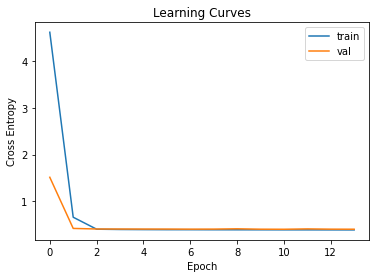

In [171]:
pyplot.title('Learning Curves')
pyplot.xlabel('Epoch')
pyplot.ylabel('Cross Entropy')
pyplot.plot(fit_model.history['loss'], label='train')
pyplot.plot(fit_model.history['val_loss'], label='val')
pyplot.legend()
pyplot.show()